In [15]:
from math import pi, tan
import thickness_sim
from scipy import optimize
from numpy import linspace


In [16]:
net = thickness_sim.NetModel()

In [17]:
net.create_net(250, 250, pi / 4, pi / 4, 40, 1, .030)
net.indie_variator(1, .001)
net.outdie_variator(1, .001)

In [26]:
def range_error(angle):
    if angle ==0:
        y_step = 1e10
    else:
        y_step = net.net_width / tan(angle) * 0.1
    print('y_step = {}'.format(y_step))
    probe_x_pos = ((.05, 0),
                   (.15, y_step),
                   (.25, y_step),
                   (.35, y_step),
                   (.45, y_step),
                   (.55, y_step),
                   (.65, y_step),
                   (.75, y_step),
                   (.85, y_step),
                   (.95, y_step))
    max_range_error = 0
    for y_start in range(40):
        net.clear_probe_pts()
        net.add_probe_pts_from_list(probe_x_pos, y_start)
#         net.plot_2d_contour()
        net.execute_probe()
#         net.print_probe_stats()
        if y_step > 20 or y_step < 2:
            max_range_error = 1
        else:
            max_range_error = max(max_range_error, net.thkns_range_probe())
    
    return max_range_error

result = optimize.minimize_scalar(range_error, bounds=(pi/8, pi/2))
# result


y_step = 10000000000.0
y_step = 2.568370463737323
y_step = -6.92884522702645
y_step = 2.568370463737323
y_step = -0.18909125891129464
y_step = 5.62631301163986
y_step = 3.8238930551492247
y_step = 4.449978724547214
y_step = 4.393751280993551
y_step = 4.2271206813806534
y_step = 4.068268495635189
y_step = 3.9731551778613703
y_step = 4.088205170350909
y_step = 4.044156788330005
y_step = 4.0168876235461
y_step = 4.000126832251182
y_step = 4.008498449049145
y_step = 4.011700752071845
y_step = 4.013681166821519
y_step = 4.0149056209044796
y_step = 4.015662562611666
y_step = 4.016130449952384
y_step = 4.016419647604105
y_step = 4.016598392040476
y_step = 4.01670886617326
y_step = 4.016777144469024
y_step = 4.016819343360012
y_step = 4.016845423931998
y_step = 4.01686154269725
y_step = 4.01687150467469
y_step = 4.01687766152786
y_step = 4.01688146667719
y_step = 4.016883818390661
y_step = 4.016885271830236
y_step = 4.0168861701055745
y_step = 4.016886725270375
y_step = 4.016887068381137
y_ste

In [28]:
angles = linspace(1 * pi / 180, 90 * pi / 180, num=20)
y = [range_error(a) for a in angles]

y_step = 229.1598465230377
y_step = 40.186887789027224
y_step = 21.86214302011159
y_step = 14.873538765682392
y_step = 11.148972527174426
y_step = 8.809345629065314
y_step = 7.185028344872091
y_step = 5.977503980277833
y_step = 5.033432767705418
y_step = 4.265845156468916
y_step = 3.6216257658342546
y_step = 3.066390071751562
y_step = 2.576784128195886
y_step = 2.1362733117713812
y_step = 1.7326998271000065
y_step = 1.3567926720611385
y_step = 1.0012156995695871
y_step = 0.6599308649112308
y_step = 0.3277501240673626
y_step = 2.4492935982947064e-16


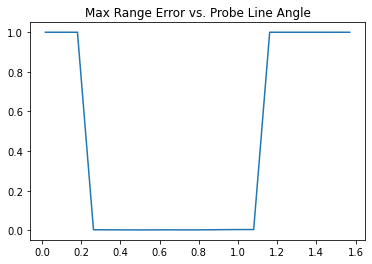

In [29]:
plt.figure()
plt.title('Max Range Error vs. Probe Line Angle')
plt.plot(angles, y)

In [21]:
best_angle = result.x
best_angle

1.6954102708161022e-11

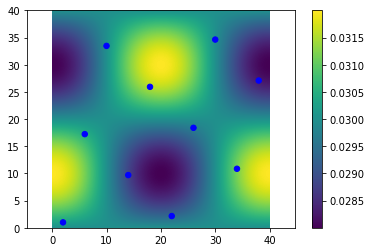

In [22]:
y_start = 1
y_step = net.net_width / tan(best_angle) * 0.1

probe_x_pos = ((.05, 0),
               (.15, y_step),
               (.25, y_step),
               (.35, y_step),
               (.45, y_step),
               (.55, y_step),
               (.65, y_step),
               (.75, y_step),
               (.85, y_step),
               (.95, y_step))
net.clear_probe_pts()
net.add_probe_pts_from_list(probe_x_pos, y_start)
net.plot_2d_contour()

In [23]:
range_error(best_angle)

y_step = 235931094016.23248


0